# 데이터 로드 + 합치기

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
# 데이터 로드
train_df = pd.read_csv('/content/drive/MyDrive/DScover/24-2 가이드/train_df.csv')
test_df = pd.read_csv('/content/drive/MyDrive/DScover/24-2 가이드/test_df.csv')

In [14]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# train_df에 대해 LabelEncoder 학습 및 변환
le = LabelEncoder()
for col in ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']:
    train_df[col + '_encoded'] = le.fit_transform(train_df[col])
    test_df[col + '_encoded'] = le.transform(test_df[col])

# # 새로운 범주 처리
# for col in ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']:
#     # LabelEncoder에 새로운 클래스 추가 ('unknown' 처리)
#     le.classes_ = np.append(le.classes_, 'unknown')

#     # unseen labels 처리: 새로운 범주를 'unknown'으로 변환
#     test_df[col] = test_df[col].apply(lambda x: x if x in le.classes_ else 'unknown')

#     # LabelEncoder로 변환
#     test_df[col + '_encoded'] = le.transform(test_df[col])

# 원본 컬럼 삭제
train_df = train_df.drop(columns=['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex'])
test_df = test_df.drop(columns=['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex'])

In [15]:
train_df = train_df.drop(columns=['Unnamed: 0'])
test_df = test_df.drop(columns=['Unnamed: 0', 'cluster'])

In [16]:
# 두 데이터를 하나로 합치기
together = pd.concat([train_df, test_df], ignore_index=True)

# 불필요한 컬럼 제거
data = together.drop(columns=['fnlwgt'])

In [17]:
data

,age,education.num,income,capital.gain_log,capital.loss_log,native.country_grouped,hours.per.week_log,workclass_encoded,education_encoded,marital.status_encoded,occupation_encoded,relationship_encoded,race_encoded,sex_encoded
0,41,13,0,0.000000,0.000000,3,3.828641,2,9,0,3,4,4,0
1,20,9,0,0.000000,0.000000,1,3.713572,2,11,4,7,3,4,0
2,73,9,0,0.000000,0.000000,3,3.637586,2,11,6,7,1,4,0
3,56,10,1,8.947546,0.000000,3,3.931826,3,15,2,3,0,4,1
4,53,7,0,0.000000,0.000000,3,3.713572,2,1,2,6,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,20,10,0,0.000000,0.000000,3,3.044522,2,15,4,7,3,4,0
32557,52,9,1,0.000000,0.000000,3,3.931826,2,11,2,3,0,4,1
32558,50,10,1,0.000000,0.000000,3,3.828641,2,15,2,12,0,4,1
32559,26,10,0,0.000000,0.000000,3,3.713572,2,15,5,4,3,4,1


# K-Means 클러스터링

In [18]:
data=data.drop(columns=['income'])

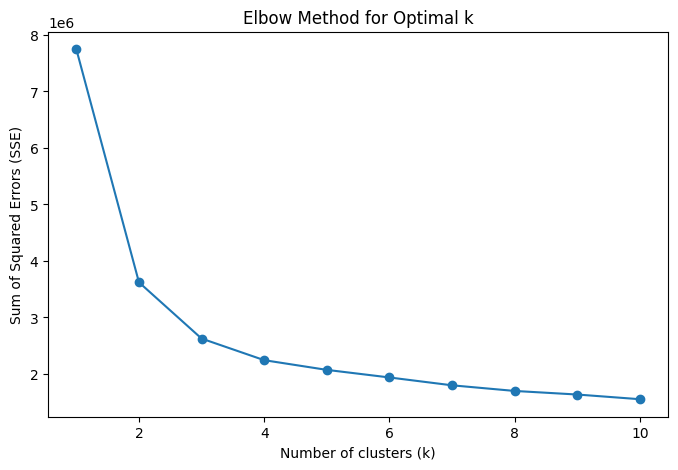

In [19]:
# 엘보우 기법 사용
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

# 엘보우 기법 시각화
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [21]:
from sklearn.metrics import silhouette_score

# k 값들 중에서 실루엣 계수를 계산할 값 선택 (엘보우 기법을 통해 선택한 k)
silhouette_scores = {}

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores[k] = silhouette_avg
    print(f"Silhouette Score for k={k}: {silhouette_avg}")

Silhouette Score for k=2: 0.4288353207956991
Silhouette Score for k=3: 0.3244929524157071
Silhouette Score for k=4: 0.25344595793780816
Silhouette Score for k=5: 0.2503495238905201
Silhouette Score for k=6: 0.22407637473821299
Silhouette Score for k=7: 0.21911925636918267
Silhouette Score for k=8: 0.2243717189914268
Silhouette Score for k=9: 0.20795965703342487
Silhouette Score for k=10: 0.20082418590997037


In [22]:
from sklearn.cluster import KMeans

# 수치형 컬럼 선택 (인코딩된 컬럼 포함)
#numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# K-means 클러스터링 수행 (k=3)
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
data['cluster'] = kmeans.fit_predict(data)

# 결과 출력
data.head()

,age,education.num,capital.gain_log,capital.loss_log,native.country_grouped,hours.per.week_log,workclass_encoded,education_encoded,marital.status_encoded,occupation_encoded,relationship_encoded,race_encoded,sex_encoded,cluster
0,41,13,0.000000,0.0,3,3.828641,2,9,0,3,4,4,0,1
1,20,9,0.000000,0.0,1,3.713572,2,11,4,7,3,4,0,2
2,73,9,0.000000,0.0,3,3.637586,2,11,6,7,1,4,0,0
3,56,10,8.947546,0.0,3,3.931826,3,15,2,3,0,4,1,0
4,53,7,0.000000,0.0,3,3.713572,2,1,2,6,0,4,1,0


## 0번군집

In [23]:
data[data['cluster']==0]

,age,education.num,capital.gain_log,capital.loss_log,native.country_grouped,hours.per.week_log,workclass_encoded,education_encoded,marital.status_encoded,occupation_encoded,relationship_encoded,race_encoded,sex_encoded,cluster
2,73,9,0.000000,0.0,3,3.637586,2,11,6,7,1,4,0,0
3,56,10,8.947546,0.0,3,3.931826,3,15,2,3,0,4,1,0
4,53,7,0.000000,0.0,3,3.713572,2,1,2,6,0,4,1,0
5,51,9,0.000000,0.0,3,3.931826,4,11,2,13,0,4,1,0
6,65,14,8.781862,0.0,3,3.583519,5,12,2,9,0,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32548,53,10,7.294377,0.0,3,3.713572,2,15,0,0,4,4,0,0
32551,55,16,9.617471,0.0,3,3.433987,2,10,2,9,0,4,1,0
32554,50,15,0.000000,0.0,3,3.931826,4,14,0,11,1,4,1,0
32557,52,9,0.000000,0.0,3,3.931826,2,11,2,3,0,4,1,0


## 1번군집

In [24]:
data[data['cluster']==1]

,age,education.num,capital.gain_log,capital.loss_log,native.country_grouped,hours.per.week_log,workclass_encoded,education_encoded,marital.status_encoded,occupation_encoded,relationship_encoded,race_encoded,sex_encoded,cluster
0,41,13,0.000000,0.0,3,3.828641,2,9,0,3,4,4,0,1
8,39,10,0.000000,0.0,3,3.713572,5,15,4,13,3,2,1,1
13,49,13,0.000000,0.0,3,3.828641,5,9,2,3,0,4,1,1
21,38,7,0.000000,0.0,3,3.713572,4,1,2,2,0,4,1,1
27,37,10,0.000000,0.0,3,3.433987,2,15,0,7,4,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32539,43,9,0.000000,0.0,3,3.713572,1,11,0,3,4,0,0,1
32547,39,11,0.000000,0.0,2,3.713572,2,8,0,7,1,0,0,1
32549,39,14,8.947546,0.0,3,3.663562,5,12,2,9,2,3,0,1
32550,39,13,0.000000,0.0,3,3.931826,2,9,2,9,0,4,1,1


##2번군집

In [25]:
data[data['cluster']==2]

,age,education.num,capital.gain_log,capital.loss_log,native.country_grouped,hours.per.week_log,workclass_encoded,education_encoded,marital.status_encoded,occupation_encoded,relationship_encoded,race_encoded,sex_encoded,cluster
1,20,9,0.000000,0.000000,1,3.713572,2,11,4,7,3,4,0,2
7,22,10,6.388561,0.000000,3,3.258097,1,15,4,9,3,4,0,2
9,32,13,9.514216,0.000000,3,3.891820,2,9,4,3,1,4,1,2
10,24,9,0.000000,0.000000,3,3.713572,2,11,4,2,1,4,1,2
11,32,9,0.000000,0.000000,3,3.891820,2,11,2,2,0,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,20,10,0.000000,0.000000,3,2.397895,4,15,4,9,3,4,1,2
32555,21,10,0.000000,0.000000,3,2.772589,5,15,4,0,1,4,0,2
32556,20,10,0.000000,0.000000,3,3.044522,2,15,4,7,3,4,0,2
32559,26,10,0.000000,0.000000,3,3.713572,2,15,5,4,3,4,1,2
